# Прогнозные модели для отбора бурёнок в поголовье

Владелец фермы хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ. Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Нужно разработать модель машинного обучения, которая поможет владельцу фермы управлять рисками и принимать объективное решение о покупке.

**Цель исследования:** Разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке.

**Задачи исследования:**

Создать две прогнозные модели для отбора бурёнок в поголовье:

- Первая будет прогнозировать возможный удой коровы (целевой признак `Удой`);
- Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак `Вкус молока`).

С помощью модели нужно отобрать коров по двум критериям:

- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

**План исследования:**

- Изучить общую информацию о данных
- Предобработать данные
- Провести исследовательский анализ данных
- Провести корреляционный анализ признаков в датасете
- Выполнить задачу регрессии
- Выполнить задачу классификации

**Описание данных:**
1. Файл `###.csv` содержит данные о стаде фермера на текущий момент.
- `id` — уникальный идентификатор коровы.
- `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
- `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
- `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
- `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Жирность,%` — содержание жиров в молоке (в процентах).
- `Белок,%` — содержание белков в молоке (в процентах).
- `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

2. Файл `###.csv` хранит имя папы каждой коровы в стаде фермера.
- `id` — уникальный идентификатор коровы.
- `Имя Папы` — имя папы коровы.

3. Файл `###.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. 
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Имя_папы` — имя папы коровы.
- `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
- `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
- `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1">Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2">Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3">Исследовательский анализ данных</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-4">Корреляционный анализ</a></span></li><li><span><a href="#Обучение-модели-линейной-регрессии" data-toc-modified-id="Обучение-модели-линейной-регрессии-5">Обучение модели линейной регрессии</a></span><ul class="toc-item"><li><span><a href="#Модель-№1" data-toc-modified-id="Модель-№1-5.1">Модель №1</a></span></li><li><span><a href="#Модель-№2" data-toc-modified-id="Модель-№2-5.2">Модель №2</a></span></li><li><span><a href="#Модель-№3" data-toc-modified-id="Модель-№3-5.3">Модель №3</a></span></li><li><span><a href="#Финальная-модель" data-toc-modified-id="Финальная-модель-5.4">Финальная модель</a></span></li></ul></li><li><span><a href="#Обучение-модели-логистической-регрессии" data-toc-modified-id="Обучение-модели-логистической-регрессии-6">Обучение модели логистической регрессии</a></span></li><li><span><a href="#Итоговые-выводы" data-toc-modified-id="Итоговые-выводы-7">Итоговые выводы</a></span></li></ul></div>

## Загрузка данных

In [1]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip list | grep scikit-learn

scikit-learn                      1.6.1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, \
    recall_score, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
plt.rcParams["figure.figsize"] = (7,7)

In [4]:
# Загружаем датасеты
try:
    ferma_main = pd.read_csv('###.csv', sep=';', decimal=',')
    ferma_dad = pd.read_csv('###.csv', sep=';', decimal=',')
    cow_buy = pd.read_csv('###.csv', sep=';', decimal=',')
except:
    ferma_main = pd.read_csv('https:###.csv', sep=';', decimal=',')
    ferma_dad = pd.read_csv('https:###.csv', sep=';', decimal=',')
    cow_buy = pd.read_csv('https:###.csv', sep=';', decimal=',')

In [5]:
# Функция для получения общей информации о датасете
def get_info(data):
    display(data.head())
    print('')
    display(data.info())
    print('')
    display(data.describe().T)
    print('')
    print('Количество явных дубликатов:', data.duplicated().sum())
    print('Количество пропусков:\n', data.isna().sum())

In [6]:
get_info(ferma_main)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возра

None

,count,mean,std,min,25%,50%,75%,max
id,634.0,317.460568,183.096982,1.000,159.250,317.500,475.750,629.000
"Удой, кг",634.0,6187.025237,1638.401021,5204.000,5751.750,6130.500,6501.000,45616.000
ЭКЕ (Энергетическая кормовая единица),634.0,14.542744,1.301301,10.900,13.500,14.700,15.600,16.800
"Сырой протеин, г",634.0,1922.682965,182.392548,1660.000,1772.250,1880.500,2058.750,2349.000
СПО (Сахаро-протеиновое соотношение),634.0,0.912855,0.032209,0.840,0.890,0.930,0.940,0.960
"Жирность,%",634.0,3.603943,0.168020,2.990,3.590,3.650,3.720,3.750
"Белок,%",634.0,3.075666,0.002540,3.069,3.074,3.076,3.077,3.085



Количество явных дубликатов: 5
Количество пропусков:
 id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64


In [7]:
get_info(ferma_dad)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,629.0,315.0,181.72094,1.0,158.0,315.0,472.0,629.0



Количество явных дубликатов: 0
Количество пропусков:
 id          0
Имя Папы    0
dtype: int64


In [8]:
get_info(cow_buy)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

,count,mean,std,min,25%,50%,75%,max
"Текущая_жирность,%",20.0,3.5775,0.126818,3.340,3.510,3.590,3.650,3.770
"Текущий_уровень_белок,%",20.0,3.0695,0.010339,3.046,3.064,3.074,3.076,3.081



Количество явных дубликатов: 4
Количество пропусков:
 Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64


**Вывод**

`ferma_main`

- Обнаружено 5 явных дубликатов -> убираем
- Стоит изменить названия столбцов и привести их к единому виду
- Пропущенных значений не выявлено
- С типами данных все в порядке

`ferma_dad`

- Стоит изменить названия столбцов и привести их к единому виду
- В остальном данные в порядке и готовы для использования

`cow_buy`

- Обнаружено 4 явных дубликата -> убирать их не будем, поскольку данных в датасете мало, как и признаков. Вполне вероятно, что данные и признаки сходятся для разных коров
- Стоит изменить названия столбцов и привести их к единому виду
- Пропущенных значений не выявлено
- С типами данных все в порядке

##  Предобработка данных

**Переименование столбцов**

In [9]:
ferma_main.rename(columns={
    'Удой, кг': 'Удой_кг',
    'ЭКЕ (Энергетическая кормовая единица)': 'ЭКЕ',
    'Сырой протеин, г': 'Протеин_г',
    'СПО (Сахаро-протеиновое соотношение)': 'СПО',
    'Тип пастбища': 'Тип_пастбища',
    'порода папы_быка': 'Порода_папы',
    'Жирность,%': 'Жирность_%',
    'Белок,%': 'Белок_%',
    'Вкус молока': 'Вкус_молока',
}, inplace=True)
ferma_main.columns

Index(['id', 'Удой_кг', 'ЭКЕ', 'Протеин_г', 'СПО', 'Порода', 'Тип_пастбища',
       'Порода_папы', 'Жирность_%', 'Белок_%', 'Вкус_молока', 'Возраст'],
      dtype='object')

In [10]:
ferma_dad.rename(columns={'Имя Папы': 'Имя_папы'}, inplace=True)
ferma_dad.columns

Index(['id', 'Имя_папы'], dtype='object')

In [11]:
cow_buy.rename(columns={
    'Тип пастбища': 'Тип_пастбища',
    'порода папы_быка': 'Порода_папы',
    'Текущая_жирность,%': 'Жирность_%',
    'Текущий_уровень_белок,%': 'Белок_%',
}, inplace=True)

cow_buy.columns

Index(['Порода', 'Тип_пастбища', 'Порода_папы', 'Имя_папы', 'Жирность_%',
       'Белок_%', 'Возраст'],
      dtype='object')

**Поиск и замена неявных дубликатов**

In [12]:
def print_unique_values(df):
    unique_values = {col: df[col].unique() for col in df.columns}
    
    for column, unique in unique_values.items():
        if df[column].dtype == 'object':
            print(f'Уникальные значения для столбца {column}: {unique}')

In [13]:
print(print_unique_values(ferma_main))
print()
print(print_unique_values(ferma_dad))
print()
print(print_unique_values(cow_buy))

Уникальные значения для столбца Порода: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения для столбца Тип_пастбища: ['Равнинное' 'Равнинные' 'Холмистое']
Уникальные значения для столбца Порода_папы: ['Айдиал' 'Соверин' 'Айдиалл']
Уникальные значения для столбца Вкус_молока: ['вкусно' 'не вкусно']
Уникальные значения для столбца Возраст: ['более_2_лет' 'менее_2_лет']
None

Уникальные значения для столбца Имя_папы: ['Буйный' 'Соловчик' 'Барин' 'Геркулес']
None

Уникальные значения для столбца Порода: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения для столбца Тип_пастбища: ['холмистое' 'равнинное']
Уникальные значения для столбца Порода_папы: ['Айдиал' 'Соверин']
Уникальные значения для столбца Имя_папы: ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
Уникальные значения для столбца Возраст: ['более_2_лет' 'менее_2_лет']
None


Обнаружены неявных дубликата:

-`Равнинные` и `Равнинное` в столбце `Тип пастбища` файла `ferma_main`
-`Айдиал` и `Айдиалл` в столбце `Порода папы`файла `ferma_main`

Также в файле `cow_buy` `Тип пастбища` прописаны с маленькой буквы, приведем к единообразному стилю с файлом `ferma_main`. 

In [14]:
# Заменяем значения
ferma_main['Тип_пастбища'].replace({'Равнинные': 'Равнинное'}, inplace=True)
ferma_main['Порода_папы'].replace({'Айдиалл': 'Айдиал'}, inplace=True)

# Проверка
display(ferma_main['Тип_пастбища'].unique())
ferma_main['Порода_папы'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

array(['Айдиал', 'Соверин'], dtype=object)

In [15]:
cow_buy['Тип_пастбища'].replace({'холмистое': 'Холмистое', 'равнинное': 'Равнинное'}, inplace=True)
cow_buy['Тип_пастбища'].unique()

array(['Холмистое', 'Равнинное'], dtype=object)

**Сброс явных дубликатов**

In [16]:
ferma_main.drop_duplicates(inplace=True)

# Проверка
print('Количество дубликатов в файле `ferma_main`:', ferma_main.duplicated().sum())

Количество дубликатов в файле `ferma_main`: 0


**Вывод**

- Названия столбцов приведены к единому, удобному виду
- Убрано 2 неявных дубликата из датасета ferma_main
- Убрано 5 явных дубликатов из ferma_main

## Исследовательский анализ данных

**Общее исследование данных**

In [17]:
ferma_main.describe().T

,count,mean,std,min,25%,50%,75%,max
id,629.0,315.000000,181.720940,1.000,158.000,315.000,472.000,629.000
Удой_кг,629.0,6188.750397,1644.795489,5204.000,5751.000,6133.000,6501.000,45616.000
ЭКЕ,629.0,14.543879,1.306408,10.900,13.500,14.700,15.600,16.800
Протеин_г,629.0,1923.364070,182.956251,1660.000,1771.000,1888.000,2062.000,2349.000
СПО,629.0,0.913116,0.032203,0.840,0.890,0.930,0.940,0.960
Жирность_%,629.0,3.603657,0.168656,2.990,3.590,3.650,3.720,3.750
Белок_%,629.0,3.075671,0.002549,3.069,3.074,3.076,3.077,3.085


В целом значения выглядят нормальными, есть аномальное значение `Удой_кг` max равное 45616 кг.

**Количественные признаки**

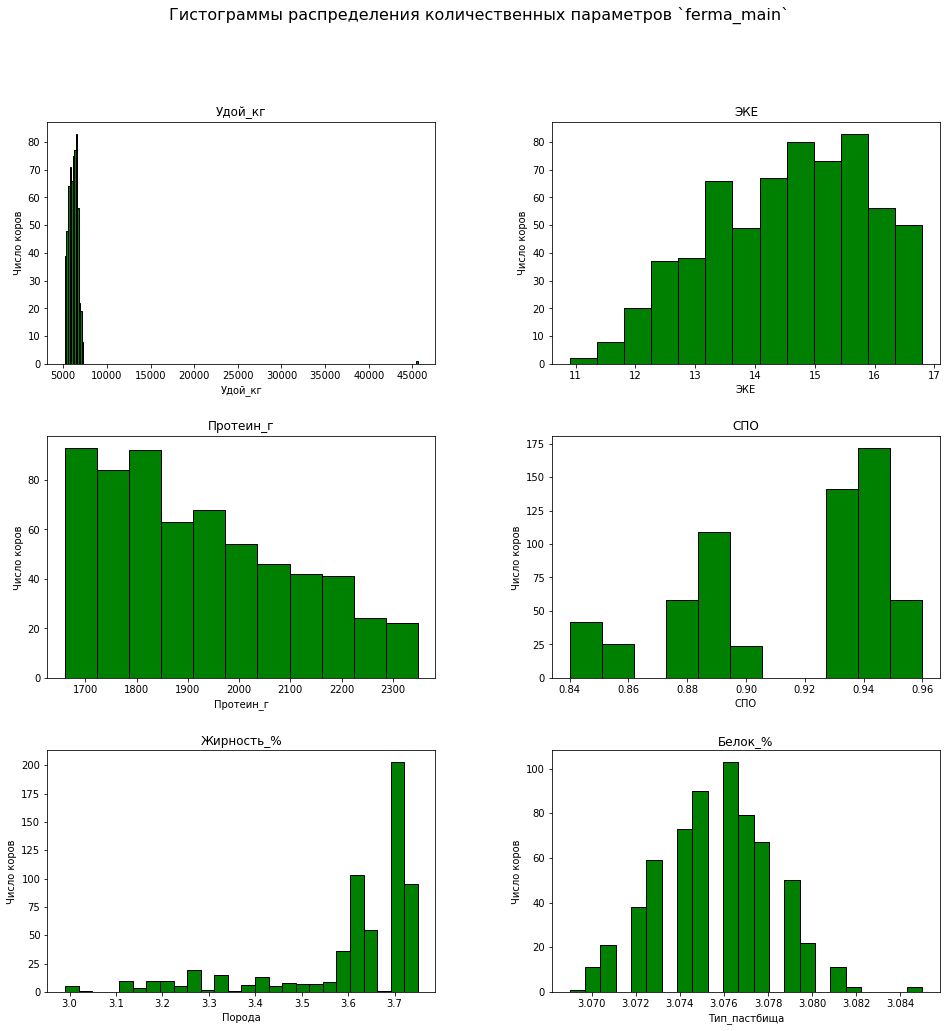

In [18]:
axes = ferma_main[ferma_main.columns[ferma_main.columns != 'id']].hist(grid= False, color = 'green', bins='auto', edgecolor='black', figsize=(16, 16));
for ax, col in zip(axes.flatten(), ferma_main.columns[ferma_main.columns != 'id']):
    ax.set_xlabel(col)
    ax.set_ylabel("Число коров")
plt.suptitle('Гистограммы распределения количественных параметров `ferma_main`', fontsize=16)
plt.show()

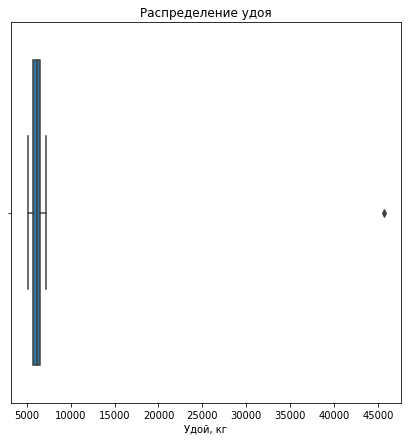

In [19]:
sns.boxplot(x=ferma_main['Удой_кг'])
plt.xlabel('Удой, кг')
plt.title('Распределение удоя')
plt.show()

Удалим единичный выброс `Удой_кг`.

In [20]:
ferma_main = ferma_main[ferma_main['Удой_кг'] < 8000]
ferma_main.describe()

,id,Удой_кг,ЭКЕ,Протеин_г,СПО,Жирность_%,Белок_%
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,315.474522,6125.968153,14.548726,1923.759554,0.913089,3.604268,3.075670
std,181.475367,475.857053,1.301777,182.832816,0.032221,0.168093,0.002551
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.750000,5749.750000,13.500000,1771.750000,0.890000,3.590000,3.074000
50%,315.500000,6132.500000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.250000,6501.000000,15.600000,2062.250000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


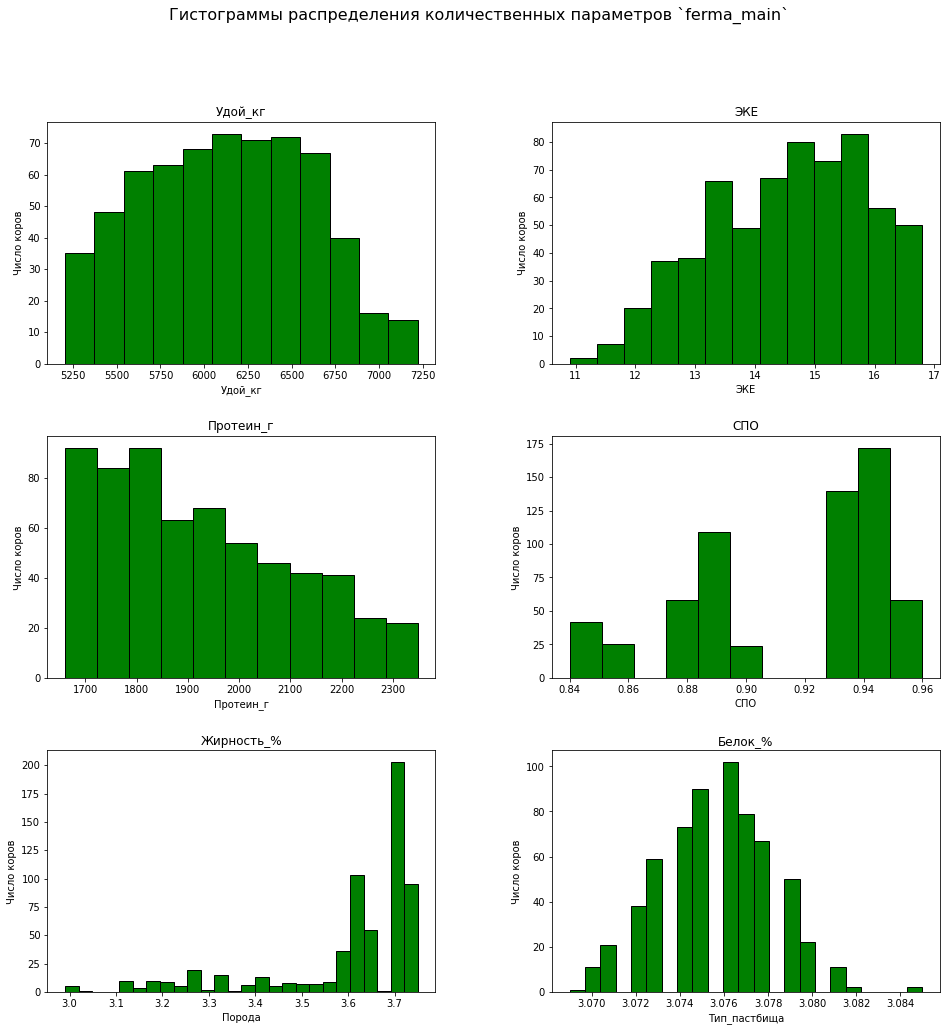

In [21]:
axes = ferma_main[ferma_main.columns[ferma_main.columns != 'id']].hist(grid= False, color = 'green', bins='auto', edgecolor='black', figsize=(16, 16));
for ax, col in zip(axes.flatten(), ferma_main.columns[ferma_main.columns != 'id']):
    ax.set_xlabel(col)
    ax.set_ylabel("Число коров")
plt.suptitle('Гистограммы распределения количественных параметров `ferma_main`', fontsize=16)
plt.show()

- Распределние `Удой, кг` носит нормальный характер, убрали выброс 45616. 
- Распределение `ЭКЕ` носит нормальный характер с левым скосом.
- Распределение `Сырой протеин, г` носит нормальный характер с правым скосом.
- Распределение `СПО` носит ненормальный характер с тремя уровнями в диапазонах 0.84-0.86, 0.88-0.9, 0.93-0.96.
- Распределение `Жирность, %` носит ненормальный характер с двумя пиками возле значений 3,6 и 3,7.
- Распределение `Белок, %` носит нормальный характер.

**Категориальные признаки**

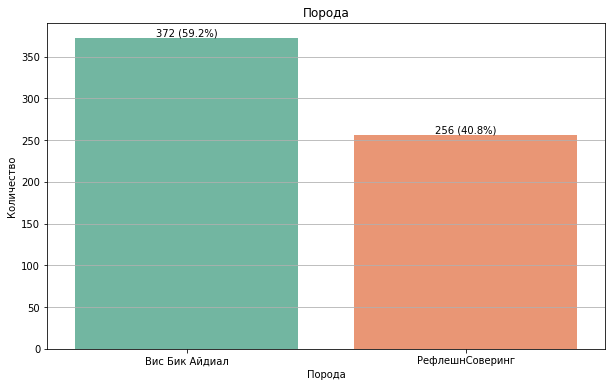

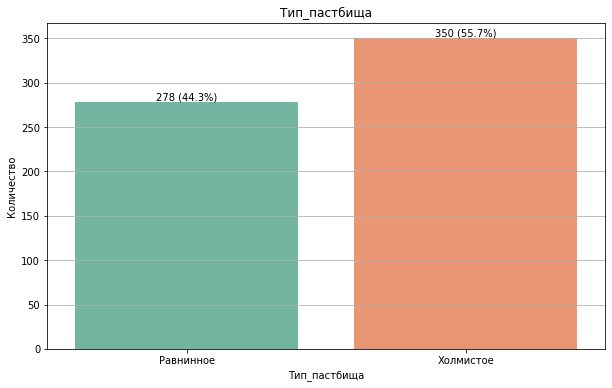

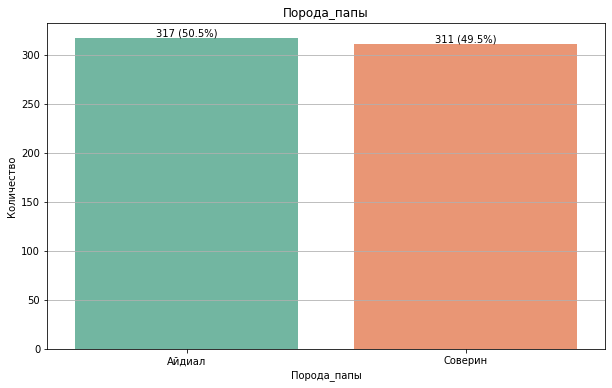

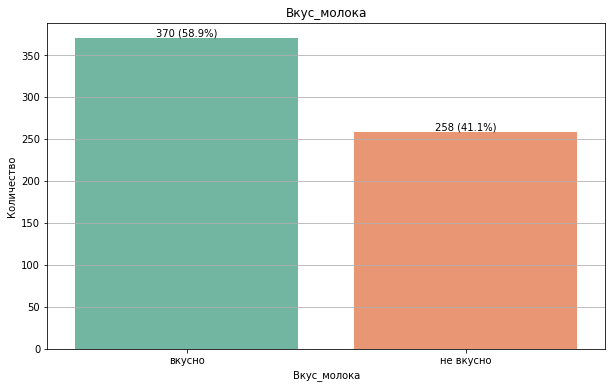

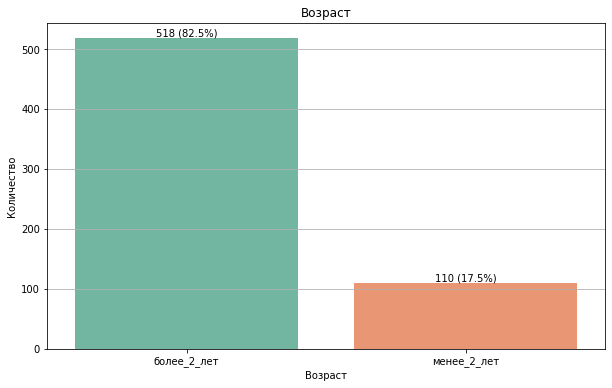

In [22]:
# Отбор столбцов с типом данных object (категориальные)
object_columns = ferma_main.select_dtypes(include=['object']).columns

# Построение столбчатых диаграмм для всех категориальных признаков
for column in object_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=ferma_main, x=column, palette='Set2')
    total = len(ferma_main[column])
    for p in ax.patches:
        count = int(p.get_height())
        percentage = count / total * 100
        ax.annotate(f'{count} ({percentage:.1f}%)', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black')
    
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Количество')
    plt.grid(axis='y')
    plt.show()

Распределение категориальных переменных в норме, критических изменений не было внесено.

**Вывод**

- Распределние Удой, кг носит нормальный характер, убрали выброс 45616.
- Распределение ЭКЕ носит нормальный характер с левым скосом.
- Распределение Сырой протеин, г носит нормальный характер с правым скосом.
- Распределение СПО носит ненормальный характер с тремя уровнями в диапазонах 0.84-0.86, 0.88-0.9, 0.93-0.96.
- Распределение Жирность, % носит ненормальный характер с двумя пиками возле значений 3,6 и 3,7.
- Распределение Белок, % носит нормальный характер.
- Распределение категориальных переменных в норме, критических изменений не было внесено.

## Корреляционный анализ

Поскольку факторы имеют относительно нормальное распределение - построим матрицу корреляций Спирмана.

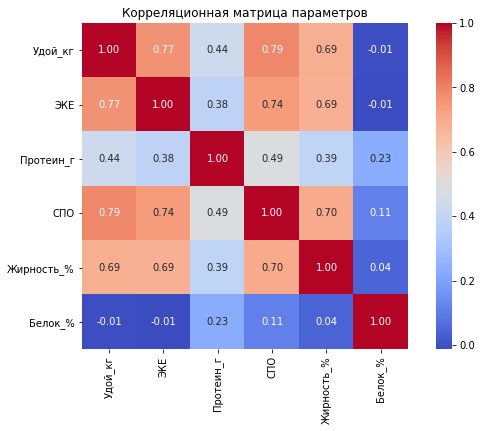

In [23]:
# Вычисление корреляционной матрицы
correlation_matrix = ferma_main.drop('id', axis=1).corr(method='spearman')

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Корреляционная матрица параметров')
plt.show()

Построим диаграммы рассеяния для признака `Удой_кг` и всех количественных признаков с учётом значения категориальных признаков.

In [24]:
quantitative_scatter = ['ЭКЕ', 'Протеин_г', 'СПО', 'Жирность_%', 'Белок_%']
def plot_scatter_plots(data, quantitative_features, hue):
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(quantitative_features, 1):
        plt.subplot(2, 3, i)
        sns.scatterplot(data=data, x=feature, y='Удой_кг', hue=hue, palette=['royalblue', 'red'], alpha=0.3)
        plt.title(f'Связь удоя с {feature}')

    plt.suptitle(f'Диаграммы рассеяния для признаков Удой и {hue}', fontsize=25)
    plt.tight_layout()
    plt.show()

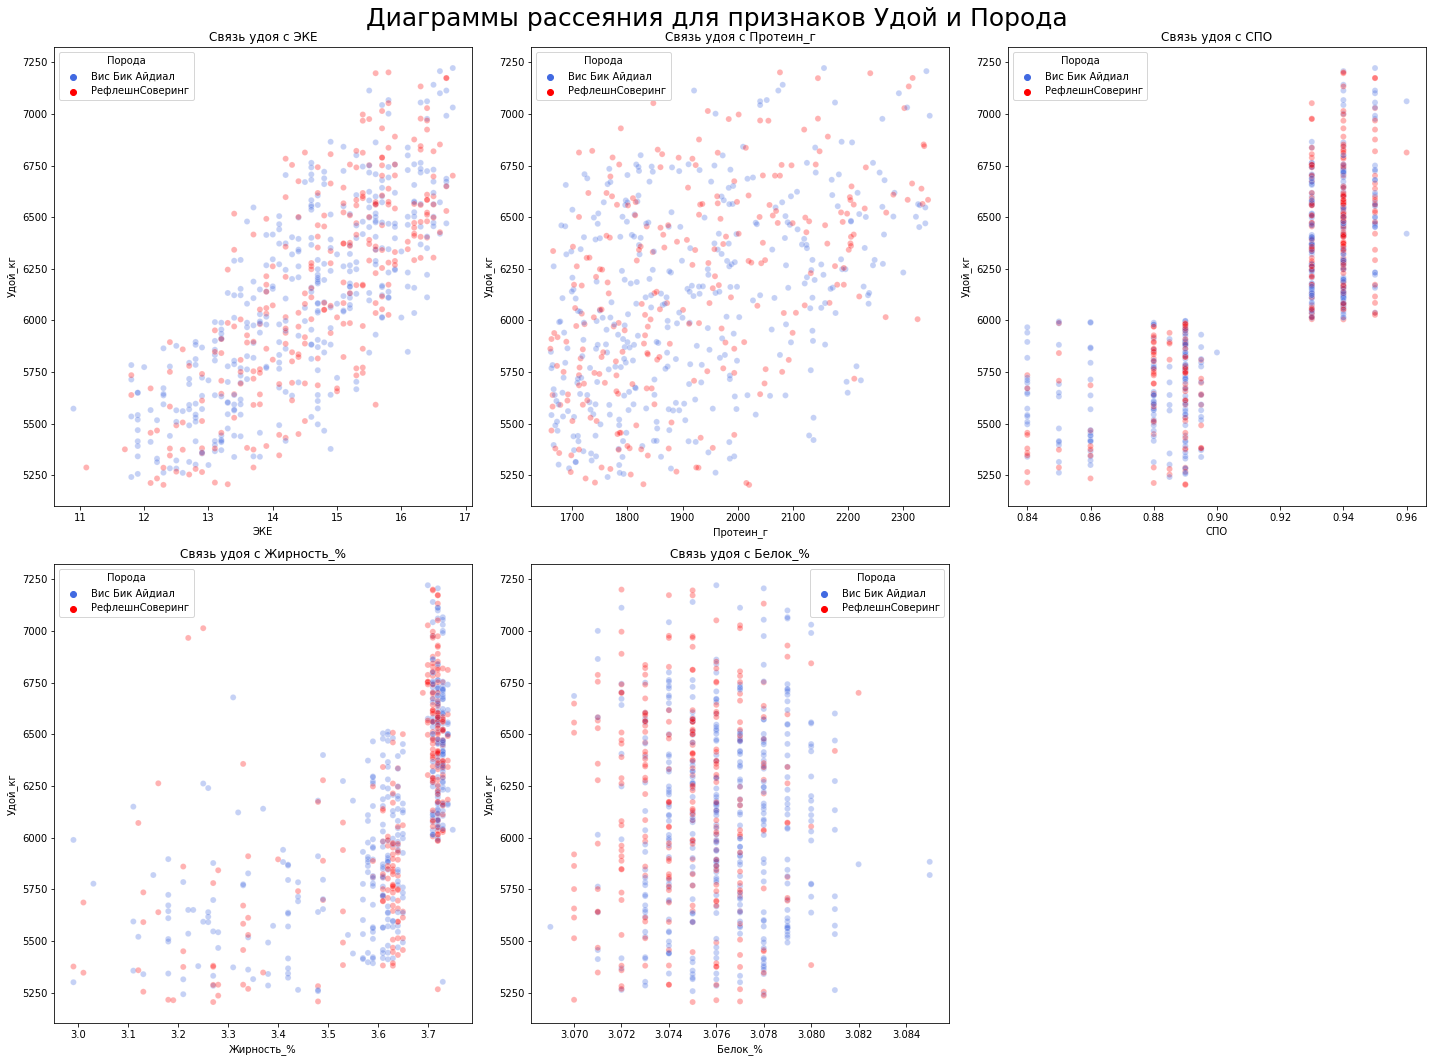

In [25]:
plot_scatter_plots(ferma_main, quantitative_scatter, hue='Порода')

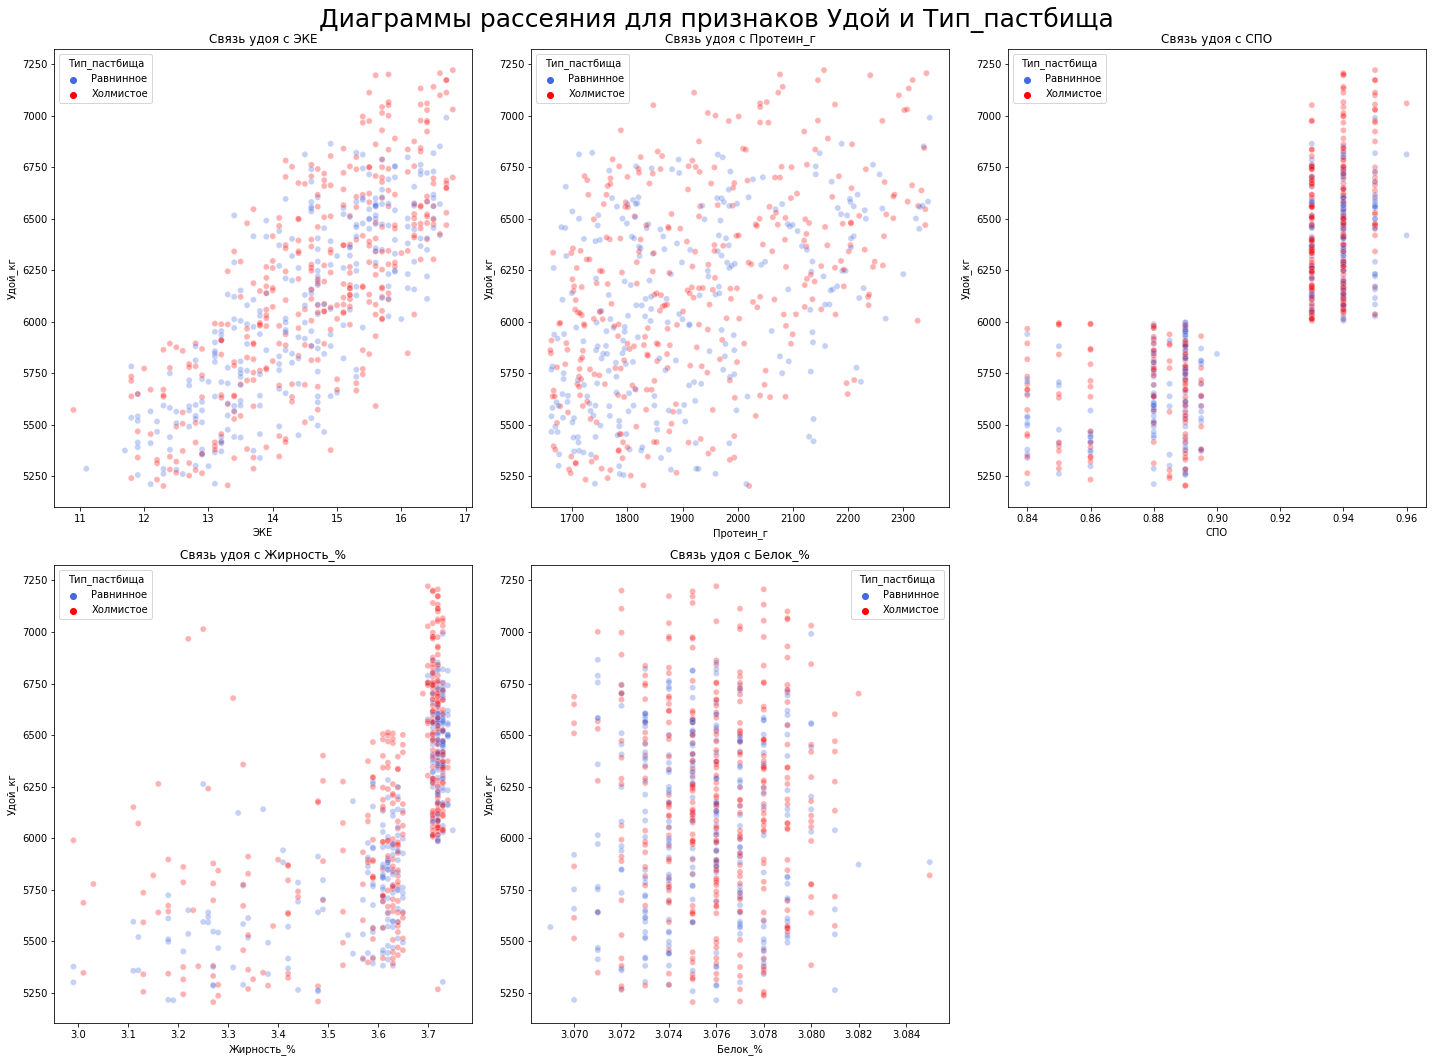

In [26]:
plot_scatter_plots(ferma_main, quantitative_scatter, hue='Тип_пастбища')

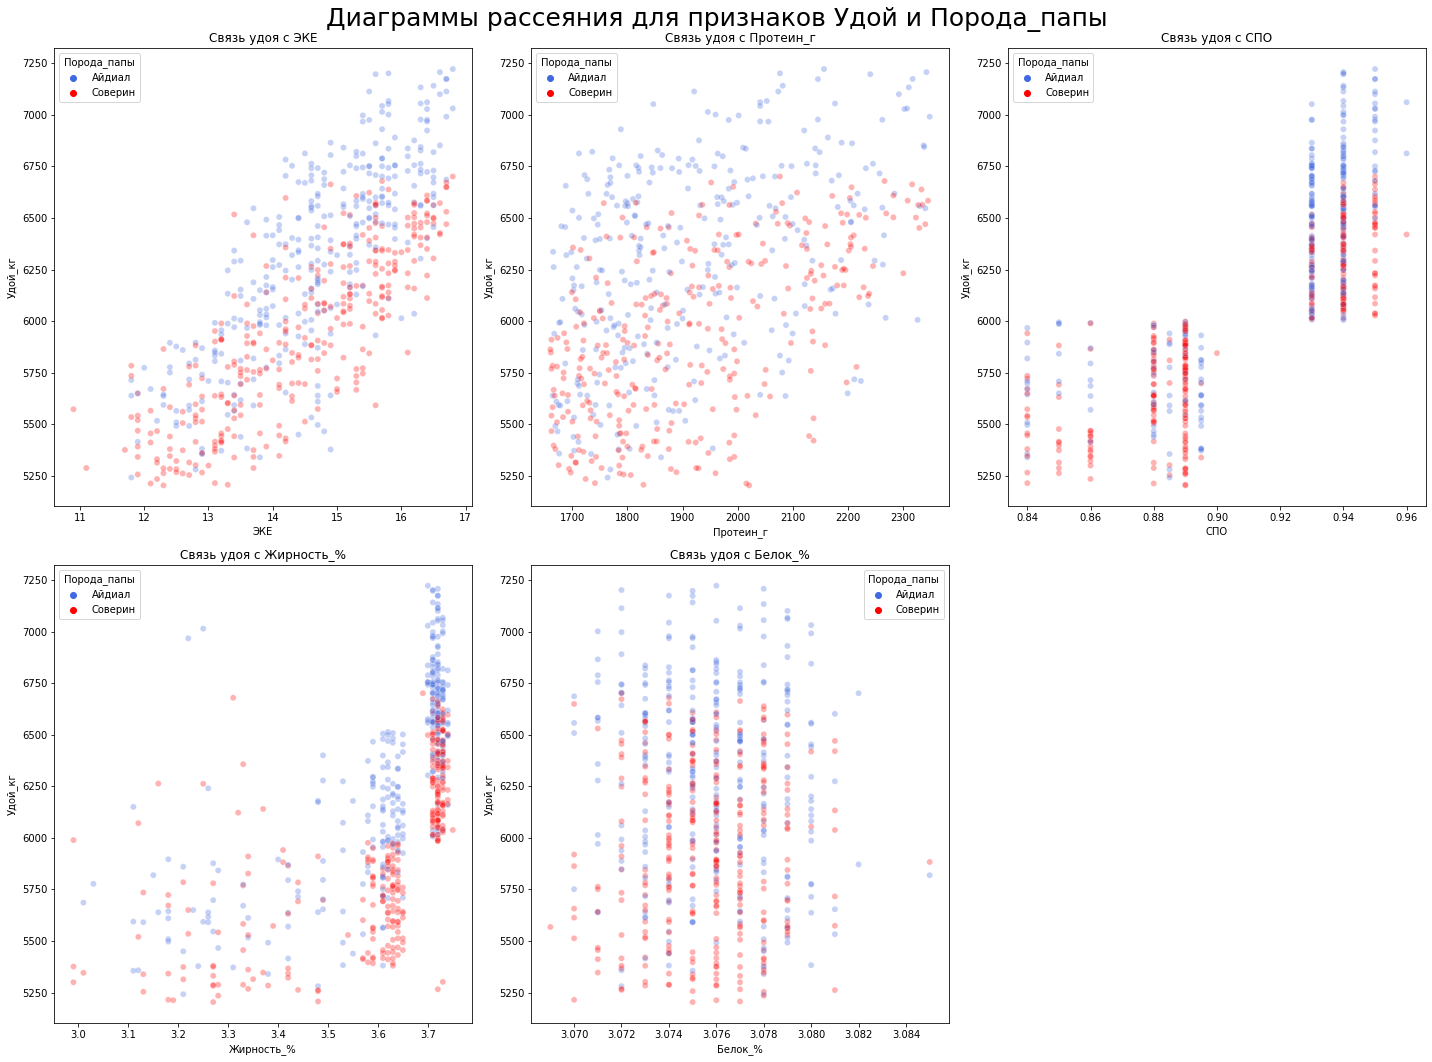

In [27]:
plot_scatter_plots(ferma_main, quantitative_scatter, hue='Порода_папы')

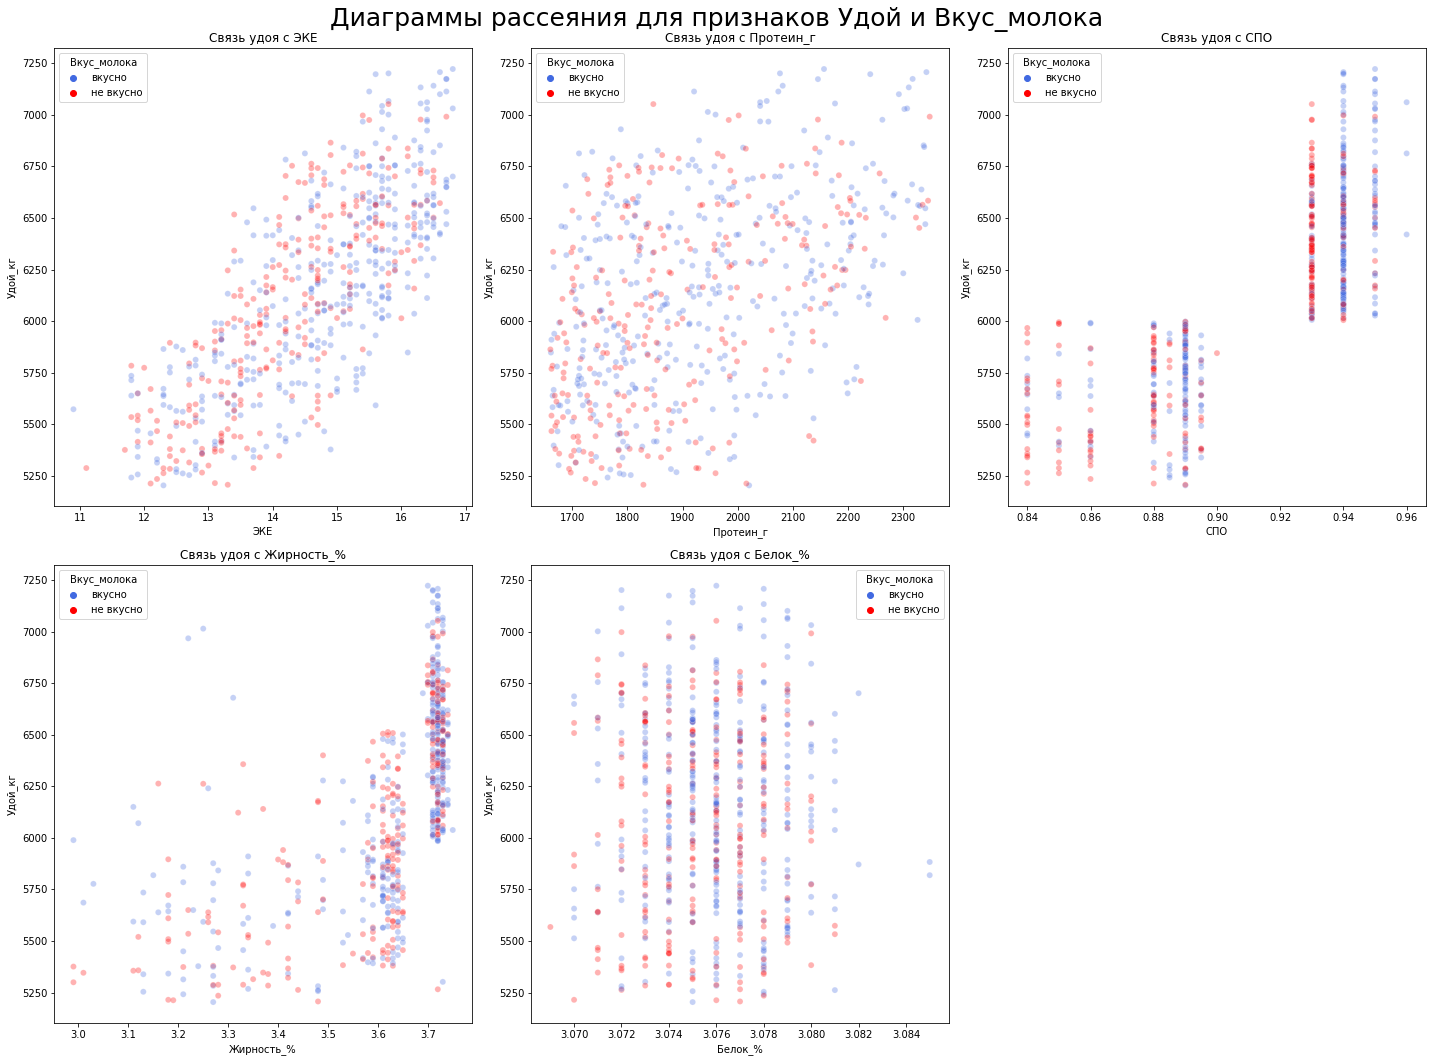

In [28]:
plot_scatter_plots(ferma_main, quantitative_scatter, hue='Вкус_молока')

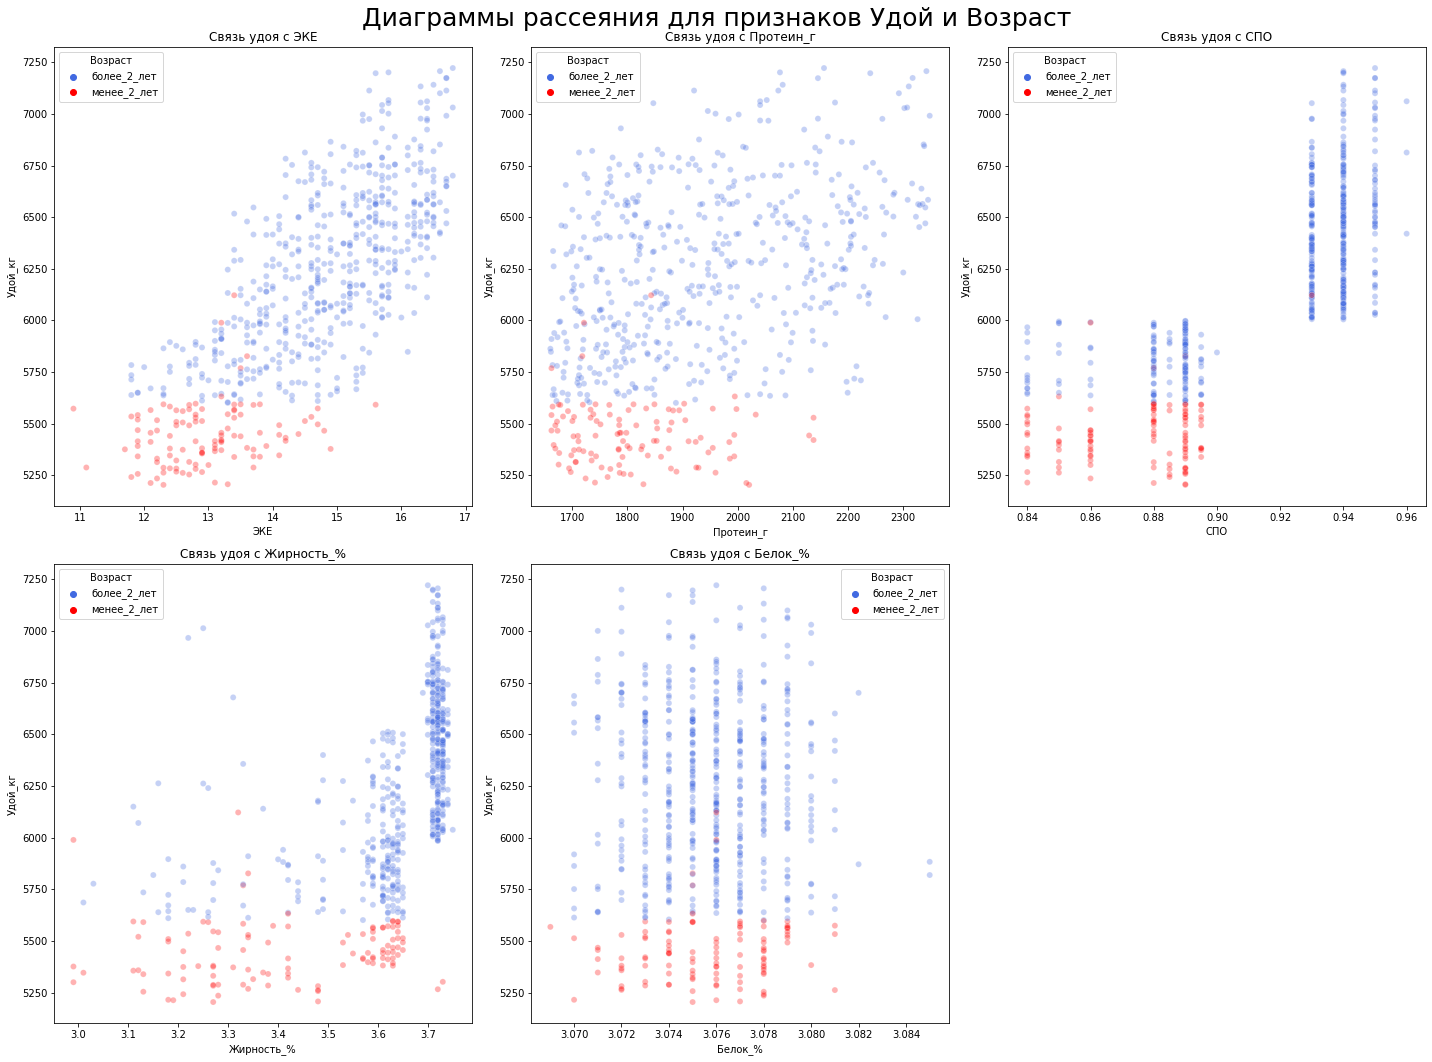

In [29]:
plot_scatter_plots(ferma_main, quantitative_scatter, hue='Возраст')

**Вывод**

- Между `Удой_кг` и `ЭКЕ` сильная линейная связь.
- Между `Удой_кг` и `Протеин_г` слабая линейная связь.
- Между `Удой_кг` и `СПО` нелинейная связь.
- Между `Удой_кг` и `Жирность_%` нелинейная связь.
- Между `Удой_кг` и `Белок_%` слабая связь.
- Из катгегориальных  признаков видно влияние на удой признаков `Порода_папы`, `Возраст`. Больший удой дают коровы с породой папы Айдиал и возрастом от 2 лет.

## Обучение модели линейной регрессии

### Модель №1

**Отбор признаков**

Из всех признаков явно можно избавиться от признака `Белок_%`. С ним связь целевого признака, фактически, отсутствует и нелинейна. `Вкус_молока` и `Жирность_%` тоже убираем, поскольку признаки являются характеристикой молока, связь с удоем не выявлена. Исключаем признак `id`.

In [30]:
ferma = ferma_main.drop(['id', 'Белок_%', 'Вкус_молока', 'Жирность_%'], axis=1)
ferma.head(1)

,Удой_кг,ЭКЕ,Протеин_г,СПО,Порода,Тип_пастбища,Порода_папы,Возраст
0,5863,14.2,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет


Разбиваем выборку.

In [31]:
RANDOM_STATE = 42

X = ferma.drop('Удой_кг', axis=1)
y = ferma['Удой_кг']

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
)

Применение OneHotEncoder и StandardScaler.

In [32]:
# Разделяем признаки на категориальные и количественные
cat_col_names = ['Порода', 'Тип_пастбища', 'Порода_папы', 'Возраст']
num_col_names = ['ЭКЕ', 'СПО', 'Протеин_г']

# Кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_valid_ohe = encoder.transform(X_valid[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

# Масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_valid_scaled = scaler.transform(X_valid[num_col_names])

# Собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_valid = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)

Обучение модели.

In [32]:
reg_1 = LinearRegression()
reg_1.fit(X_train, y_train)
predictions = reg_1.predict(X_valid)
r2_1 = r2_score(y_valid, predictions)
mse_1 = mean_squared_error(y_valid, predictions)
rmse_1 = mean_squared_error(y_valid, predictions, squared=False)
mae_1 = mean_absolute_error(y_valid, predictions)
print(f'R2_score первой модели: {r2_1}')

R2_score первой модели: 0.7844078173416966


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Анализ остатков.

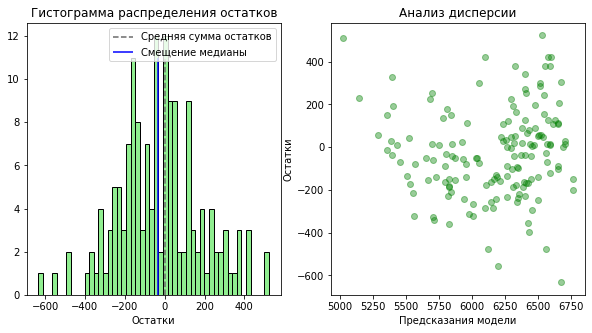

In [33]:
# Выделяем остатки
residuals_1 = y_valid - predictions

# Строим гистограмму распределения
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].hist(residuals_1, bins=50, color='lightgreen', edgecolor='black')
zero = axes[0].vlines(x=0, colors='dimgrey', ymin=0, ymax=11, linestyles='--', label='Средняя сумма остатков')
median = axes[0].vlines(x=residuals_1.median(), colors='blue', ymin=0, ymax=11, label='Смещение медианы')
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# Строим график дисперсии
axes[1].scatter(predictions, residuals_1, color='green', alpha=0.4)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Остатки нормально распределены, график — симметричен от самого частого значения. Смещение медианы предсказаний минимально. В целом, остатки имеют постоянную дисперсию на всём интервале использования модели. Разница между минимумом и максимумом остатков при любых прогнозных значениях модели минимальна. 
r2_score первой модели = 0.784

### Модель №2

Преобразование признаков.

In [34]:
# Создадим копию датасета
ferma_2 = ferma_main.copy(deep=True)

# Проверка
display(ferma_main.shape)
display(ferma_2.shape)
display(ferma_2.head())

(628, 12)

(628, 12)

,id,Удой_кг,ЭКЕ,Протеин_г,СПО,Порода,Тип_пастбища,Порода_папы,Жирность_%,Белок_%,Вкус_молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


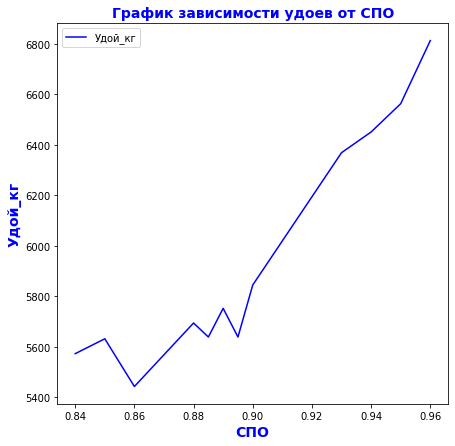

In [35]:
ferma_main.pivot_table(index='СПО', values='Удой_кг', aggfunc='median').plot(color = 'blue')
plt.xlabel('СПО', fontsize=14, fontweight="bold", color='blue')
plt.ylabel('Удой_кг', fontsize=14, fontweight="bold", color='blue')
plt.title('График зависимости удоев от СПО', fontsize=14, fontweight="bold", color='blue')
plt.show()

Наблюдаем на графике зависимости целевого признака от СПО. Определяем визуально, что значение 0.9 является границой нелинейности. Введем СПО в котегориальный признак, учтя полученное значение границы нелинейности.

ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.

In [36]:
# Преобразуем СПО в категориальный признак
ferma_2['СПО_кат'] = ferma_2['СПО'].apply(lambda x: 1 if x > 0.9 else 0)
display(ferma_2['СПО_кат'].value_counts())

# Преобразуем признак ЭКЕ 
ferma_2['ЭКЕ_в_2'] = ferma_2['ЭКЕ'] ** 2

# Убираем неважные столбцы
ferma_2 = ferma_2.drop(['id', 'Белок_%', 'Жирность_%', 'Вкус_молока', 'ЭКЕ', 'СПО'], axis=1)
ferma_2.head()

1    370
0    258
Name: СПО_кат, dtype: int64

,Удой_кг,Протеин_г,Порода,Тип_пастбища,Порода_папы,Возраст,СПО_кат,ЭКЕ_в_2
0,5863,1743,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,0,201.64
1,5529,2138,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,0,163.84
2,5810,1854,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,0,196.00
3,5895,2012,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,0,153.76
4,5302,1675,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,0,163.84


Разбиваем выборку

In [37]:
X = ferma_2.drop('Удой_кг', axis=1)
y = ferma_2['Удой_кг']

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
)

Применение OneHotEncoder и StandardScaler

In [38]:
# Разделяем признаки на категориальные и количественные
cat_col_names = ['Порода', 'Тип_пастбища', 'Порода_папы', 'Возраст', 'СПО_кат']
num_col_names = ['ЭКЕ_в_2', 'Протеин_г']

# Кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_valid_ohe = encoder.transform(X_valid[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

# Масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_valid_scaled = scaler.transform(X_valid[num_col_names])

# Собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_valid = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)

Обучение модели

In [39]:
reg_2 = LinearRegression()
reg_2.fit(X_train, y_train)
predictions = reg_2.predict(X_valid)
mse_2 = mean_squared_error(y_valid, predictions)
rmse_2 = mean_squared_error(y_valid, predictions, squared=False)
mae_2 = mean_absolute_error(y_valid, predictions)
r2_2 = r2_score(y_valid, predictions)
print(f'R2_score второй модели: {r2_2}')

R2_score второй модели: 0.8180879926867501


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Анализ остатков

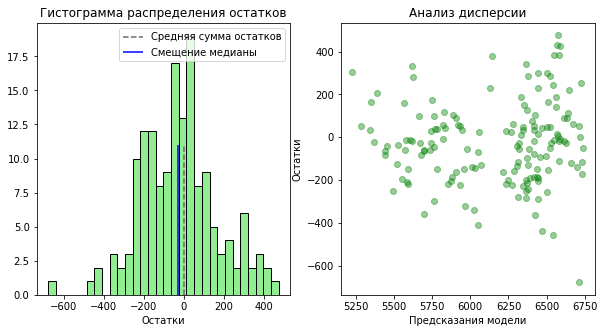

In [40]:
# Выделяем остатки
residuals_2 = y_valid - predictions

# Строим гистограмму распределения
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].hist(residuals_2, bins=30, color='lightgreen', edgecolor='black')
zero = axes[0].vlines(x=0, colors='dimgrey', ymin=0, ymax=11, linestyles='--', label='Средняя сумма остатков')
median = axes[0].vlines(x=residuals_2.median(), colors='blue', ymin=0, ymax=11, label='Смещение медианы')
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# Строим график дисперсии
axes[1].scatter(predictions, residuals_2, color='green', alpha=0.4)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Остатки весьма нормально распределены, график — относительно симметричен от самого частого значения. Отклонение от средней суммы остатков 0 - минимально. Дисперсия остатков - нормальная. Разница между минимумом и максимумом остатков при любых прогнозных значениях модели минимальна.
r2_score второй модели = 0.818

### Модель №3

Добавляем новый признак и избавляемся от нелинейности признаков

In [41]:
# Добавляем в данные признак Имя_папы из файла ferma_dad
ferma_full = ferma_main.merge(ferma_dad, on='id')
ferma_full.head()

# Преобразуем СПО в категориальный признак
ferma_full['СПО_кат'] = ferma_full['СПО'].apply(lambda x: 1 if x > 0.9 else 0)

# Преобразуем признак ЭКЕ 
ferma_full['ЭКЕ_в_2'] = ferma_full['ЭКЕ'] ** 2

# Убираем неважные столбцы
ferma_full = ferma_full.drop(['id', 'Белок_%', 'Жирность_%', 'Вкус_молока', 'ЭКЕ', 'СПО'], axis=1)
new_order = ['Удой_кг', 'Порода', 'Тип_пастбища', 'Порода_папы', 'Имя_папы', 'Возраст', 'ЭКЕ_в_2', 'Протеин_г', 'СПО_кат']
ferma_full = ferma_full[new_order]
ferma_full.head()

,Удой_кг,Порода,Тип_пастбища,Порода_папы,Имя_папы,Возраст,ЭКЕ_в_2,Протеин_г,СПО_кат
0,5863,Вис Бик Айдиал,Равнинное,Айдиал,Буйный,более_2_лет,201.64,1743,0
1,5529,Вис Бик Айдиал,Равнинное,Соверин,Соловчик,менее_2_лет,163.84,2138,0
2,5810,РефлешнСоверинг,Холмистое,Соверин,Барин,более_2_лет,196.00,1854,0
3,5895,РефлешнСоверинг,Холмистое,Айдиал,Буйный,более_2_лет,153.76,2012,0
4,5302,Вис Бик Айдиал,Равнинное,Соверин,Барин,менее_2_лет,163.84,1675,0


Разбиваем выборку

In [42]:
X = ferma_full.drop('Удой_кг', axis=1)
y = ferma_full['Удой_кг']

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
)

Объединим тренировочную и валидационную выборки (на будущее)

In [43]:
X_train_full = pd.concat([X_train, X_valid], ignore_index=True)
y_train_full = pd.concat([y_train, y_valid], ignore_index=True)

Применение OneHotEncoder и StandardScaler

In [44]:
# Разделяем признаки на категориальные и количественные
cat_col_names = ['Порода', 'Тип_пастбища', 'Порода_папы', 'Имя_папы', 'Возраст', 'СПО_кат']
num_col_names = ['ЭКЕ_в_2', 'Протеин_г']

# Кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_valid_ohe = encoder.transform(X_valid[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

# Масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_valid_scaled = scaler.transform(X_valid[num_col_names])

# Собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_valid = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)

Обучение модели

In [45]:
reg_3 = LinearRegression()
reg_3.fit(X_train, y_train)
predictions = reg_3.predict(X_valid)
mse_3 = mean_squared_error(y_valid, predictions)
rmse_3 = mean_squared_error(y_valid, predictions, squared=False)
mae_3 = mean_absolute_error(y_valid, predictions)
r2_3 = r2_score(y_valid, predictions)
print(f'R2_score третьей модели: {r2_3}')

R2_score третьей модели: 0.8247542745210408


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Анализ остатков

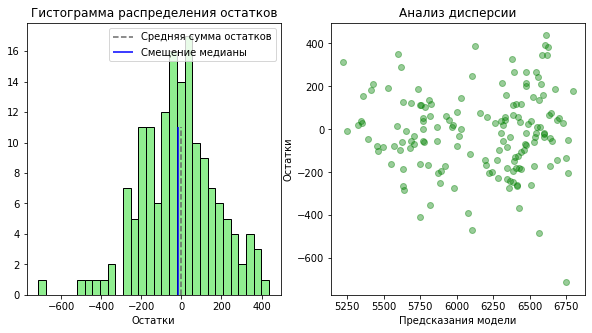

In [46]:
# Выделяем остатки
residuals_3 = y_valid - predictions

# Строим гистограмму распределения
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].hist(residuals_3, bins=30, color='lightgreen', edgecolor='black')
zero = axes[0].vlines(x=0, colors='dimgrey', ymin=0, ymax=11, linestyles='--', label='Средняя сумма остатков')
median = axes[0].vlines(x=residuals_3.median(), colors='blue', ymin=0, ymax=11, label='Смещение медианы')
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# Строим график дисперсии
axes[1].scatter(predictions, residuals_3, color='green', alpha=0.4)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Остатки в порядке и нормально распределены, график — относительно симметричен от самого частого значения. Отклонение от средней суммы остатков - наименьшее среди всех моделей. Дисперсия остатков - нормальная.
r2_score третьей модели = 0.825.

**Сравнение трех моделей**

In [47]:
# Сравнение r2_score
scores_compared = {'первой': r2_1, 'второй': r2_2, 'третьей': r2_3}
for k, v in scores_compared.items():
    print(f'R2_score {k} модели: {v}')

print('---')

# Сравнение остатков
residuals_compared = {'первой': residuals_1, 'второй': residuals_2, 'третьей': residuals_3}
for k, v in residuals_compared.items():
    print(f'Среднее значение остатков {k} модели: {v.mean()}')

R2_score первой модели: 0.7844078173416966
R2_score второй модели: 0.8180879926867501
R2_score третьей модели: 0.8247542745210408
---
Среднее значение остатков первой модели: -25.37328620820125
Среднее значение остатков второй модели: -24.37279813553191
Среднее значение остатков третьей модели: -15.201522000921457


На данном этапе третья модель показывает наилучшее значение r2_score = 0.825 и среднее значение остатков -15.2.

**Дополнительные метрики**

In [48]:
# Пропишем циклы, выводящие основные метрики
mse_compared = {'первой': mse_1, 'второй': mse_2, 'третьей': mse_3}
for k, v in mse_compared.items():
    print(f'MSE {k} модели: {v}')

print('---')

rmse_compared = {'первой': rmse_1, 'второй': rmse_2, 'третьей': rmse_3}
for k, v in rmse_compared.items():
    print(f'RMSE {k} модели: {v}')

print('---')

mae_compared = {'первой': mae_1, 'второй': mae_2, 'третьей': mae_3}
for k, v in mae_compared.items():
    print(f'MAE {k} модели: {v}')

MSE первой модели: 43887.01500966052
MSE второй модели: 37030.91131113695
MSE третьей модели: 35673.88988618192
---
RMSE первой модели: 209.49227911706083
RMSE второй модели: 192.43417396901452
RMSE третьей модели: 188.87532895055912
---
MAE первой модели: 164.2419446347493
MAE второй модели: 149.03965222364602
MAE третьей модели: 146.1630244536231


In [49]:
# Посчитаем 95% доверительный интервал лучшей модели 
print('95% доверительный интервал =',
      st.norm.interval(confidence=0.95, loc=np.mean(predictions), scale=st.sem(predictions)))

95% доверительный интервал = (6092.340075854288, 6221.3750700583805)


Лучшая модель - третья. Модель в среднем ошибается на 189.7 кг в предсказаниях.

- MAE - 146.2
- MSE - 35673.9
- RMSE - 188.8
- 95% доверительный интервал лучшей модели = (6092, 6221). Для более точной рекомендации `Удоя-ru` будем брать по верхней границе доверительного интервала - 6221.

### Финальная модель

Добавляем недостающие признаки

In [50]:
# Создаем копию датасета
cow_buy_2 = cow_buy.copy(deep=True)

# Считаем среднее значение каждого недостающего признака и увеличиваем их на 5%
mean_values = ferma_main[['ЭКЕ', 'Протеин_г', 'СПО']].mean()
new_values = mean_values * 1.05

# Добавляем недостающие признаки в датасет cow_buy и преобразовываем их
cow_buy_2['ЭКЕ'] = new_values['ЭКЕ']
cow_buy_2['ЭКЕ_в_2'] = cow_buy_2['ЭКЕ'] ** 2
cow_buy_2['ЭКЕ_в_2'] = cow_buy_2['ЭКЕ_в_2'].round(2)
cow_buy_2['Протеин_г'] = new_values['Протеин_г'].round().astype('int64')
cow_buy_2['СПО'] = new_values['СПО']
cow_buy_2['СПО_кат'] = cow_buy_2['СПО'].apply(lambda x: 1 if x > 0.9 else 0)

# Форматируем cow_buy
cow_buy_2 = cow_buy_2.drop(['Белок_%', 'ЭКЕ', 'СПО', 'Жирность_%'], axis=1)

# Проверка
display(cow_buy_2.shape)
display(X_train_full.shape)
display(cow_buy_2.head())
display(X_train_full.head())
X_train_full.info()
cow_buy_2.info()

(20, 8)

(628, 8)

,Порода,Тип_пастбища,Порода_папы,Имя_папы,Возраст,ЭКЕ_в_2,Протеин_г,СПО_кат
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,более_2_лет,233.36,2020,1
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,менее_2_лет,233.36,2020,1
2,РефлешнСоверинг,Равнинное,Соверин,Барин,более_2_лет,233.36,2020,1
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,более_2_лет,233.36,2020,1
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,более_2_лет,233.36,2020,1


,Порода,Тип_пастбища,Порода_папы,Имя_папы,Возраст,ЭКЕ_в_2,Протеин_г,СПО_кат
0,РефлешнСоверинг,Холмистое,Соверин,Соловчик,более_2_лет,272.25,2123,1
1,РефлешнСоверинг,Холмистое,Соверин,Барин,менее_2_лет,156.25,1889,0
2,Вис Бик Айдиал,Равнинное,Айдиал,Буйный,более_2_лет,216.09,1671,0
3,Вис Бик Айдиал,Холмистое,Айдиал,Буйный,более_2_лет,207.36,2063,1
4,Вис Бик Айдиал,Равнинное,Айдиал,Геркулес,более_2_лет,171.61,2077,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Порода        628 non-null    object 
 1   Тип_пастбища  628 non-null    object 
 2   Порода_папы   628 non-null    object 
 3   Имя_папы      628 non-null    object 
 4   Возраст       628 non-null    object 
 5   ЭКЕ_в_2       628 non-null    float64
 6   Протеин_г     628 non-null    int64  
 7   СПО_кат       628 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 39.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Порода        20 non-null     object 
 1   Тип_пастбища  20 non-null     object 
 2   Порода_папы   20 non-null     object 
 3   Имя_папы      20 non-null     object 
 4   Возраст       20 non-null     object 


Кодируем и масштабируем признаки тестовой выборки

In [51]:
X_test_ohe = encoder.transform(cow_buy_2[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

X_test_scaled = scaler.transform(cow_buy_2[num_col_names])

X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Обучаем модель

In [52]:
pred = reg_3.predict(X_test_full)
pred

array([6609.92926678, 6378.72099833, 6284.0097453 , 6593.09934651,
       6542.1560363 , 6425.39018756, 6609.92926678, 6571.26970709,
       6284.0097453 , 6400.55063776, 6344.71782973, 6617.93889631,
       6609.92926678, 6127.48471228, 6284.0097453 , 6593.09934651,
       6344.71782973, 6425.39018756, 6571.26970709, 6542.1560363 ])

In [53]:
cow_buy['Удой_кг'] = pred
cow_buy

,Порода,Тип_пастбища,Порода_папы,Имя_папы,Жирность_%,Белок_%,Возраст,Удой_кг
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6609.929267
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6378.720998
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6284.009745
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6593.099347
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6542.156036
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6425.390188
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6609.929267
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6571.269707
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6284.009745
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6400.550638


In [54]:
cow_buy.query('Удой_кг > 6221')

,Порода,Тип_пастбища,Порода_папы,Имя_папы,Жирность_%,Белок_%,Возраст,Удой_кг
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6609.929267
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6378.720998
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6284.009745
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6593.099347
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6542.156036
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6425.390188
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6609.929267
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6571.269707
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6284.009745
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6400.550638


Учитывая, что задача отобрать коров с удоем не менее 6221 кг, то под этот критерий попадают все коровы.

**Вывод**

Выявили лучшую модель из трех, показатели которой:
- MAE - 146.2
- MSE - 35673.9
- RMSE - 188.8
- 95% доверительный интервал лучшей модели = (6092, 6221)

Получили предсказания по всем коровам продавца. По условию задачи регрессии, можем на данном этапе рекомендовать фермеру для покупки всех коров. Каждая из них, вероятно, выдает более 6000 кг удоя в год, однако еще стоит предсказать, молоко каких коров будет вкусным.

## Обучение модели логистической регрессии

In [55]:
# Копия основного датасета
ferma_log = ferma_main.copy(deep=True)

In [56]:
ferma_log = ferma_log.merge(ferma_dad, how  ='inner', on = 'id')
#ferma_log['СПО'] = ferma_log['СПО'].apply(lambda x: 1 if x > 0.9 else 0)
ferma_log['Вкус_молока'] = ferma_log['Вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0)
ferma_log['Возраст'] = ferma_log['Возраст'].apply(lambda x: 1 if x == 'Более 2 лет' else 0)
ferma_log = ferma_log.drop(['id', 'Удой_кг'], axis=1)
ferma_log.head()

,ЭКЕ,Протеин_г,СПО,Порода,Тип_пастбища,Порода_папы,Жирность_%,Белок_%,Вкус_молока,Возраст,Имя_папы
0,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,0,Буйный
1,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,0,Соловчик
2,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,0,0,Барин
3,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,0,0,Буйный
4,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,0,Барин


In [57]:
# Выделение признаков, кодирование, масштабирование
X = ferma_log.drop('Вкус_молока', axis=1)
y = ferma_log['Вкус_молока']

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
    stratify=y
)

# Заранее создадим объединенную тренировочную выборку
X_train_full = pd.concat([X_train, X_valid], ignore_index=True)
y_train_full = pd.concat([y_train, y_valid], ignore_index=True)

cat_col_names = ['Порода', 'Тип_пастбища', 'Порода_папы', 'Имя_папы', 'Возраст', 'СПО']
num_col_names = ['Жирность_%', 'Белок_%', 'ЭКЕ', 'Протеин_г']

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_valid_ohe = encoder.transform(X_valid[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_valid_scaled = scaler.transform(X_valid[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_valid = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)

In [58]:
# Обучение модели
clf = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

clf_accuracy = accuracy_score(y_pred, y_valid)
clf_recall = recall_score(y_pred, y_valid)
clf_precision = precision_score(y_pred, y_valid)

print(f'Accuracy: {clf_accuracy}')
print(f'Recall: {clf_recall}')
print(f'Precision: {clf_precision}')

Accuracy: 0.6815286624203821
Recall: 0.7019230769230769
Precision: 0.7934782608695652


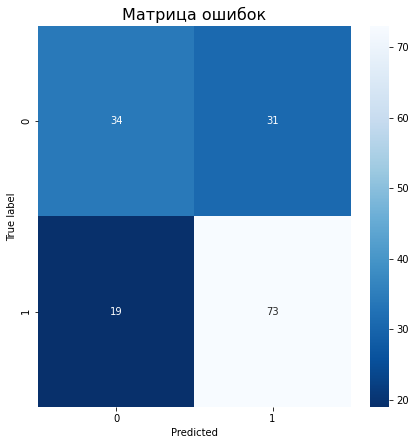

In [59]:
# Построение матрицы ошибок
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted');

Метрика precision имеет неплохое значение - 0.793, однако стоит обратить внимание на ошибки первого рода. Имеем 31 ошибку первого рода, по отношению к 73 верноположительным предсказаниям. Учитывая постановку задачи, фермеру важно, чтобы молоко было вкусным, поэтому наиболее критичным представляются ошибки первого рода, подберем порог FP = 0.

**Подбор порога класса**

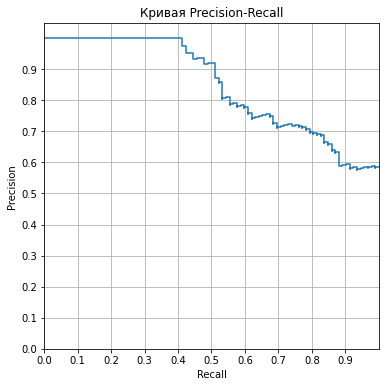

In [60]:
probabilities_valid = clf.predict_proba(X_valid)
precision, recall, thresholds = precision_recall_curve(y_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.xticks(np.arange(0, 1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))
plt.grid()
plt.title('Кривая Precision-Recall')
plt.show()

In [61]:
# Выведем вероятности класса predict_proba() и правильные ответы
y_proba = clf.predict_proba(X_valid)[:, 1]

proba_data = pd.DataFrame(zip(y_valid, y_proba),
                          columns=['y_valid', 'y_proba']).sort_values(by='y_proba', ascending=False)

proba_data.head()

,y_valid,y_proba
138,1,0.963184
7,1,0.946143
56,1,0.940358
39,1,0.938635
124,1,0.937156


In [62]:
# Функция расчета метрик для каждого порога
def threshold_choice(threshold_list, proba_df):
    result_df = pd.DataFrame(columns=['порог', 'precision', 'recall', 'количество_FP', 'число_предсказанных_объектов',
                                      'всего_объектов_класса_1'])

    for threshold in threshold_list:
        column_name = 'y_pred_' + str(threshold)

        # Precision
        precision = proba_df.loc[proba_df[column_name] == 1, 'y_valid'].mean()

        # Число предсказанных объектов
        predicted_objects = proba_df[column_name].sum()

        # Всего объектов класса 1
        total_objects_class_1 = proba_df['y_valid'].sum()

        # Recall
        recall = proba_df.loc[(proba_df[column_name] == 1) & (proba_df['y_valid'] == 1)].shape[
                     0] / total_objects_class_1

        # Количество ложноположительных предсказаний (FP)
        false_positives = proba_df.loc[(proba_df[column_name] == 1) & (proba_df['y_valid'] == 0)].shape[0]

        # Добавляем результаты в датафрейм
        result_df = result_df.append({
            'порог': threshold,
            'precision': precision,
            'recall': recall,
            'количество_FP': false_positives,
            'число_предсказанных_объектов': predicted_objects,
            'всего_объектов_класса_1': total_objects_class_1,
        }, ignore_index=True)

    return result_df

In [63]:
# Общий перебор порогов
proba_data_1 = proba_data.copy(deep=True)

thresholds_1 = [round(i, 2) for i in np.linspace(0.1, 1, num=10, endpoint=False)]
columns = []

for i in thresholds_1:
    columns.append('y_pred_' + str(i))
    proba_data_1['y_pred_' + str(i)] = proba_data_1['y_proba'].apply(lambda x: 1 if x > i else 0)

proba_data_1.head(5)

,y_valid,y_proba,y_pred_0.1,y_pred_0.19,y_pred_0.28,y_pred_0.37,y_pred_0.46,y_pred_0.55,y_pred_0.64,y_pred_0.73,y_pred_0.82,y_pred_0.91
138,1,0.963184,1,1,1,1,1,1,1,1,1,1
7,1,0.946143,1,1,1,1,1,1,1,1,1,1
56,1,0.940358,1,1,1,1,1,1,1,1,1,1
39,1,0.938635,1,1,1,1,1,1,1,1,1,1
124,1,0.937156,1,1,1,1,1,1,1,1,1,1


In [64]:
# Применение функции
threshold_choice(thresholds_1, proba_data_1)

,порог,precision,recall,количество_FP,число_предсказанных_объектов,всего_объектов_класса_1
0,0.10,0.583333,0.989130,65.0,156.0,92.0
1,0.19,0.587413,0.913043,59.0,143.0,92.0
2,0.28,0.623077,0.880435,49.0,130.0,92.0
3,0.37,0.655462,0.847826,41.0,119.0,92.0
4,0.46,0.690909,0.826087,34.0,110.0,92.0
5,0.55,0.720430,0.728261,26.0,93.0,92.0
6,0.64,0.760000,0.619565,18.0,75.0,92.0
7,0.73,0.844828,0.532609,9.0,58.0,92.0
8,0.82,1.000000,0.413043,0.0,38.0,92.0
9,0.91,1.000000,0.108696,0.0,10.0,92.0


In [65]:
# Более детальный перебор порогов
proba_data_2 = proba_data.copy(deep=True)

thresholds_2 = [round(i, 2) for i in np.linspace(0.73, 0.9, num=11, endpoint=False)]

columns = []

for i in thresholds_2:
    columns.append('y_pred_' + str(i))
    proba_data_2['y_pred_' + str(i)] = proba_data_2['y_proba'].apply(lambda x: 1 if x > i else 0)

proba_data_2.head(5)

,y_valid,y_proba,y_pred_0.73,y_pred_0.75,y_pred_0.76,y_pred_0.78,y_pred_0.79,y_pred_0.81,y_pred_0.82,y_pred_0.84,y_pred_0.85,y_pred_0.87,y_pred_0.88
138,1,0.963184,1,1,1,1,1,1,1,1,1,1,1
7,1,0.946143,1,1,1,1,1,1,1,1,1,1,1
56,1,0.940358,1,1,1,1,1,1,1,1,1,1,1
39,1,0.938635,1,1,1,1,1,1,1,1,1,1,1
124,1,0.937156,1,1,1,1,1,1,1,1,1,1,1


In [66]:
# Применение функции
threshold_choice(thresholds_2, proba_data_2)

,порог,precision,recall,количество_FP,число_предсказанных_объектов,всего_объектов_класса_1
0,0.73,0.844828,0.532609,9.0,58.0,92.0
1,0.75,0.859649,0.532609,8.0,57.0,92.0
2,0.76,0.870370,0.510870,7.0,54.0,92.0
3,0.78,0.920000,0.500000,4.0,50.0,92.0
4,0.79,0.933333,0.456522,3.0,45.0,92.0
5,0.81,0.952381,0.434783,2.0,42.0,92.0
6,0.82,1.000000,0.413043,0.0,38.0,92.0
7,0.84,1.000000,0.391304,0.0,36.0,92.0
8,0.85,1.000000,0.380435,0.0,35.0,92.0
9,0.87,1.000000,0.326087,0.0,30.0,92.0


In [67]:
# Выделяем оптимальный порог
OPTIMAL_THRESHOLD = 0.82

# Применение порога к предсказанным вероятностям
y_pred_threshold = (y_proba > OPTIMAL_THRESHOLD).astype(int)

clf_accuracy_new = accuracy_score(y_valid, y_pred_threshold)
clf_recall_new = recall_score(y_valid, y_pred_threshold)
clf_precision_new = precision_score(y_valid, y_pred_threshold)

print(f'Old Accuracy: {clf_accuracy}')
print(f'Old Recall: {clf_recall}')
print(f'Old Precision: {clf_precision}')
print('---')
print(f'New Accuracy: {clf_accuracy_new}')
print(f'New Recall: {clf_recall_new}')
print(f'New Precision: {clf_precision_new}')

Old Accuracy: 0.6815286624203821
Old Recall: 0.7019230769230769
Old Precision: 0.7934782608695652
---
New Accuracy: 0.6560509554140127
New Recall: 0.41304347826086957
New Precision: 1.0


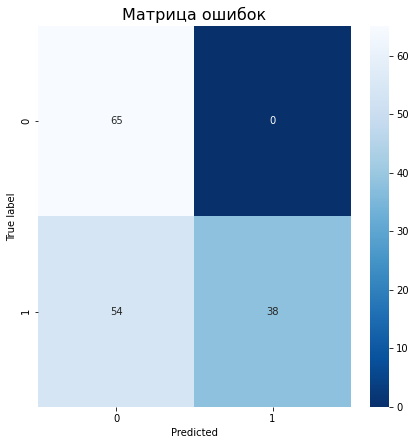

In [68]:
# Построение матрицы ошибок
cm_new = confusion_matrix(y_valid, y_pred_threshold)
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted');

Мы снизили количество ошибок первого рода с 31 до 0. Далее создадим новую тренировочную выборку, обучим на ней нашу модель с новым порогом и получим предсказания на тестовой выборке.

**Прогноз вкуса молока коров**

In [69]:
cow_buy_3 = cow_buy.copy(deep=True)

In [70]:
cow_buy_3['ЭКЕ'] = ferma_main['ЭКЕ'].mean()*1.05
cow_buy_3['СПО'] = ferma_main['СПО'].mean()*1.05
cow_buy_3['Протеин_г'] = ferma_main['Протеин_г'].mean()*1.05
cow_buy_3['Протеин_г'] = cow_buy_3['Протеин_г'].round().astype('int64')

#cow_buy_3['СПО'] = cow_buy_3['СПО'].apply(lambda x: 1 if x > 0.9 else 0)
cow_buy_3['Возраст'] = cow_buy_3['Возраст'].apply(lambda x: 1 if x == 'Более 2 лет' else 0)
cow_buy_3 = cow_buy_3.drop(['Удой_кг'], axis=1)
new_ord = ['ЭКЕ', 'Протеин_г', 'СПО', 'Порода', 'Тип_пастбища', 'Порода_папы', 'Жирность_%', 'Белок_%', 'Возраст', 'Имя_папы']
cow_buy_3 = cow_buy_3[new_ord]
cow_buy_3.head()

,ЭКЕ,Протеин_г,СПО,Порода,Тип_пастбища,Порода_папы,Жирность_%,Белок_%,Возраст,Имя_папы
0,15.276162,2020,0.958744,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,0,Геркулес
1,15.276162,2020,0.958744,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.081,0,Буйный
2,15.276162,2020,0.958744,РефлешнСоверинг,Равнинное,Соверин,3.59,3.074,0,Барин
3,15.276162,2020,0.958744,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.061,0,Буйный
4,15.276162,2020,0.958744,РефлешнСоверинг,Равнинное,Айдиал,3.64,3.074,0,Буйный


In [71]:
X_train_full.head()

,ЭКЕ,Протеин_г,СПО,Порода,Тип_пастбища,Порода_папы,Жирность_%,Белок_%,Возраст,Имя_папы
0,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,0,Барин
1,14.8,1750,0.940,РефлешнСоверинг,Холмистое,Соверин,3.72,3.076,0,Барин
2,12.8,1769,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.48,3.072,0,Барин
3,13.9,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,3.62,3.076,0,Барин
4,14.8,2140,0.940,Вис Бик Айдиал,Холмистое,Соверин,3.72,3.076,0,Барин


In [72]:
cow_buy_3_ohe = encoder.transform(cow_buy_3[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

cow_buy_3_scaled = scaler.transform(cow_buy_3[num_col_names])

X_test_ohe = pd.DataFrame(cow_buy_3_ohe, columns=encoder_col_names)

X_test_scaled = pd.DataFrame(cow_buy_3_scaled, columns=num_col_names)

X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [73]:
y_proba = clf.predict_proba(X_test_full)[:, 1]
predictions_final = (y_proba > OPTIMAL_THRESHOLD).astype(int)

In [74]:
cow_buy['Вкус_молока'] = predictions_final
cow_buy['Вкус_молока'] = cow_buy['Вкус_молока'].apply(lambda x: 'вкусно' if x == 1 else 'не вкусно')
to_buy = cow_buy.query('Вкус_молока == "вкусно"')
cow_buy

,Порода,Тип_пастбища,Порода_папы,Имя_папы,Жирность_%,Белок_%,Возраст,Удой_кг,Вкус_молока
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6609.929267,не вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6378.720998,не вкусно
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6284.009745,не вкусно
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6593.099347,не вкусно
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6542.156036,не вкусно
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,6425.390188,не вкусно
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6609.929267,не вкусно
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6571.269707,не вкусно
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6284.009745,не вкусно
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6400.550638,вкусно


Список коров с ассоциации пастбищ "ЭкоФерма" с признаком по вкусу молока "вкусно".

In [75]:
to_buy

,Порода,Тип_пастбища,Порода_папы,Имя_папы,Жирность_%,Белок_%,Возраст,Удой_кг,Вкус_молока
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.4,3.079,менее_2_лет,6400.550638,вкусно


Коровы, рекомендованные к покупке с учетом условий `Вкус_молока` - "вкусно" и `Удой_кг` > 6221 кг:

In [76]:
to_buy.query('Удой_кг > 6221')

,Порода,Тип_пастбища,Порода_папы,Имя_папы,Жирность_%,Белок_%,Возраст,Удой_кг,Вкус_молока
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.4,3.079,менее_2_лет,6400.550638,вкусно


**Вывод**
- Подобрали параметры и обучили модель логистической регрессии
- Проанализировали модель и минимизировали количество критических ошибок первого рода до 0, подобрав новый порог для вероятности предсказаний
- Определили 1 корову, чье молоко предсказано как "вкусное"
- Отобрали для рекомендации 1 корову, учитывая оба условия заказчика.

## Итоговые выводы

В ходе работы над проектом была разработана модель машинного обучения, которая сможет помочь заказчику управлять рисками и принимать объективное решение о покупке коров на ферму. Проведенный анализ показал, что требованиям фермера соответствует 1 корова.

Исследование было разделено на несколько этапов:

1. Загрузка и подготовка данных

- Импортировали нужные библиотеки

- `ferma_main`

  - Обнаружили 5 явных дубликатов
  - Определили, что стоит изменить названия столбцов и привести их к единому виду
  - Не выявили пропущенных значений
  - Определили, что с типами данных все в порядке
- `ferma_dad`

  - Определили, что стоит изменить названия столбцов и привести их к единому виду
  - В остальном данные оказались в порядке и пригодными для использования
- `cow_buy`

  - Обнаружили 4 явных дубликата -> решили не убирать, поскольку данных в датасете мало, как и признаков. Вполне вероятно, что данные и признаки сходятся для разных коров
  - Определили, что стоит изменить названия столбцов и привести их к единому виду
  - Пропущенных значений не было выявлено
  - Определили, что с типами данных все в порядке
2. Предобработка данных

- Названия столбцов привели к единому, удобному виду
- Убрали 2 неявных дубликата из датасета ferma_main
- Убрали 5 явных дубликатов из ferma_main
3. Исследовательский анализ данных

- Выявили, что почти все признаки распределены нормально и не требуют особых корректировок выбросов
- Убрали аномальное значение признака [удой] == 45616
- В распределение категориальных переменных критических изменений внесено не было
4. Корреляционный анализ данных
- Между Удой_кг и ЭКЕ сильная линейная связь.
- Между Удой_кг и Протеин_г слабая линейная связь.
- Между Удой_кг и СПО нелинейная связь.
- Между Удой_кг и Жирность_% нелинейная связь.
- Между Удой_кг и Белок_% слабая связь.
- Из категориальных признаков видно влияние на удой признаков Порода_папы, Возраст. Больший удой дают коровы с породой папы Айдиал и возрастом от 2 лет.

5. Обучение модели линейной регрессии (предсказание удоя)

- Обучили 3 модели линейной регрессии и проанализировали их остатки

- Выявили лучшую модель из трех на валидационной выборке, показатели которой:

  - MAE - 146.2
 - MSE - 35673.9
  - RMSE - 188.8
  - 95% доверительный интервал лучшей модели = (6092, 6221)
- Получили предсказания по всем коровам продавца. По условию задачи регрессии, можем на данном этапе рекомендовать фермеру для покупки всех коров. Каждая из них, вероятно, выдает более 6000 кг удоя в год, однако еще стоит предсказать, молоко каких коров будет вкусным.
6. Обучение модели логистической регрессии (предсказания вкуса молока)

- Подобрали параметры и обучили модель логистической регрессии
- Проанализировали модель и минимизировали количество критических ошибок первого рода до 0, подобрав новый порог для вероятности предсказаний
- Определили 1 корову, чье молоко предсказано как "вкусное"
- Отобрали для рекомендации 1 корову, учитывая оба условия заказчика.